In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from cobaya.yaml import yaml_load_file
#
from getdist.mcsamples import MCSamplesFromCobaya
from getdist.mcsamples import loadMCSamples
import getdist.plots as gdplt
#
import os

In [3]:
info = yaml_load_file("boss_s01_z061_sig8_xi.yaml")
print(info['params'].keys())
print(info['output'])

dict_keys(['Omega_m', 'sig8', 'b1', 'b2', 'bs', 'alpha0', 'alpha2'])
chains/boss_s01_z061_sig8_xi


/global/cscratch1/sd/mwhite/Fitting/Cobaya/chains/boss_s01_z061_sig8_xi.5.txt
/global/cscratch1/sd/mwhite/Fitting/Cobaya/chains/boss_s01_z061_sig8_xi.6.txt
/global/cscratch1/sd/mwhite/Fitting/Cobaya/chains/boss_s01_z061_sig8_xi.2.txt
/global/cscratch1/sd/mwhite/Fitting/Cobaya/chains/boss_s01_z061_sig8_xi.4.txt
/global/cscratch1/sd/mwhite/Fitting/Cobaya/chains/boss_s01_z061_sig8_xi.3.txt
/global/cscratch1/sd/mwhite/Fitting/Cobaya/chains/boss_s01_z061_sig8_xi.7.txt
/global/cscratch1/sd/mwhite/Fitting/Cobaya/chains/boss_s01_z061_sig8_xi.8.txt
/global/cscratch1/sd/mwhite/Fitting/Cobaya/chains/boss_s01_z061_sig8_xi.1.txt


Removed 0.3 as burn in
Mean:
[ 0.75329301  1.11990173 -0.85039941  1.02389577  0.53324343 -0.19868128
 16.14854318 16.14854318 52.98299443 52.98299443]


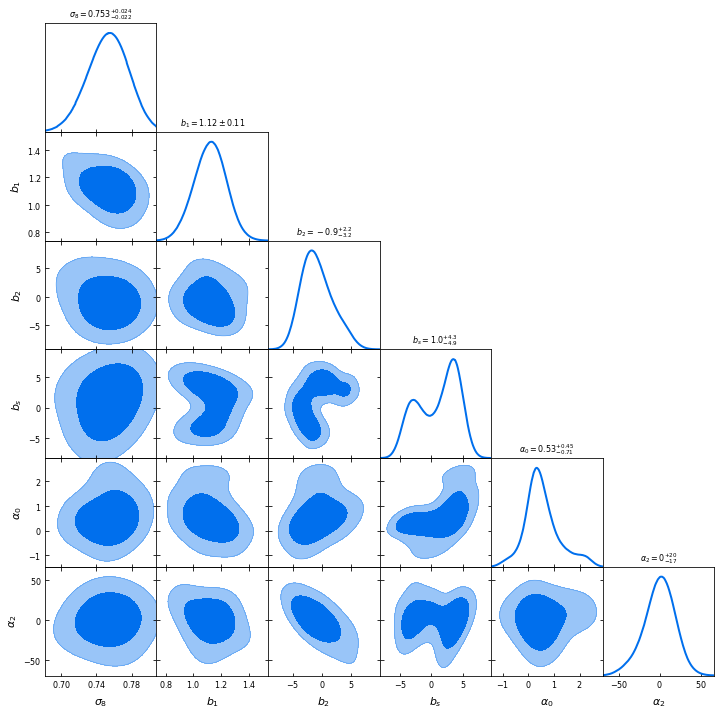

In [4]:
samples = loadMCSamples(os.path.abspath(info["output"]),\
                        settings={'ignore_rows':0.3})
# Analyze and plot
mean  = samples.getMeans()
print("Mean:")
print(mean)
#
gdplot = gdplt.get_subplot_plotter()
gdplot.triangle_plot(samples,\
                     ["sig8","b1","b2","bs","alpha0","alpha2"],\
                     filled=True,\
                     title_limit=1,contour_lws=2)

In [5]:
chains = []
for yaml in [\
            "boss_s01_z038_sig8_xi.yaml",\
            "boss_s01_z061_sig8_xi.yaml",\
            ]:
    info= yaml_load_file(yaml)
    cc  = loadMCSamples(os.path.abspath(info["output"]),\
                        settings={'ignore_rows':0.3})
    #p   = cc.getParams()
    #cc.addDerived(p.sigma8*(p.Omega_m/0.3)**0.5,name='S8',label='S_8')
    chains.append(cc)
#
for cc in chains:
    for k in ["sig8","b1","b2","bs","alpha0","alpha2"]:
        print( cc.getInlineLatex(k) )
    print("#")

/global/cscratch1/sd/mwhite/Fitting/Cobaya/chains/boss_s01_z038_sig8_xi.7.txt
/global/cscratch1/sd/mwhite/Fitting/Cobaya/chains/boss_s01_z038_sig8_xi.4.txt
/global/cscratch1/sd/mwhite/Fitting/Cobaya/chains/boss_s01_z038_sig8_xi.3.txt
/global/cscratch1/sd/mwhite/Fitting/Cobaya/chains/boss_s01_z038_sig8_xi.2.txt
/global/cscratch1/sd/mwhite/Fitting/Cobaya/chains/boss_s01_z038_sig8_xi.1.txt
/global/cscratch1/sd/mwhite/Fitting/Cobaya/chains/boss_s01_z038_sig8_xi.6.txt


/global/cscratch1/sd/mwhite/Fitting/Cobaya/chains/boss_s01_z038_sig8_xi.8.txt
/global/cscratch1/sd/mwhite/Fitting/Cobaya/chains/boss_s01_z038_sig8_xi.5.txt
Removed 0.3 as burn in
\sigma_8 = 0.740^{+0.031}_{-0.027}
b_1 = 1.16^{+0.10}_{-0.12}
b_2 = -0.8^{+1.9}_{-1.7}
b_s = 0.3^{+2.7}_{-2.4}
\alpha_0 = 0.7^{+1.4}_{-1.2}
\alpha_2 = 8\pm 27
#
\sigma_8 = 0.753^{+0.024}_{-0.022}
b_1 = 1.12\pm 0.11
b_2 = -0.9^{+2.2}_{-3.2}
b_s = 1.0^{+4.3}_{-4.9}
\alpha_0 = 0.53^{+0.45}_{-0.71}
\alpha_2 = 0^{+20}_{-17}
#


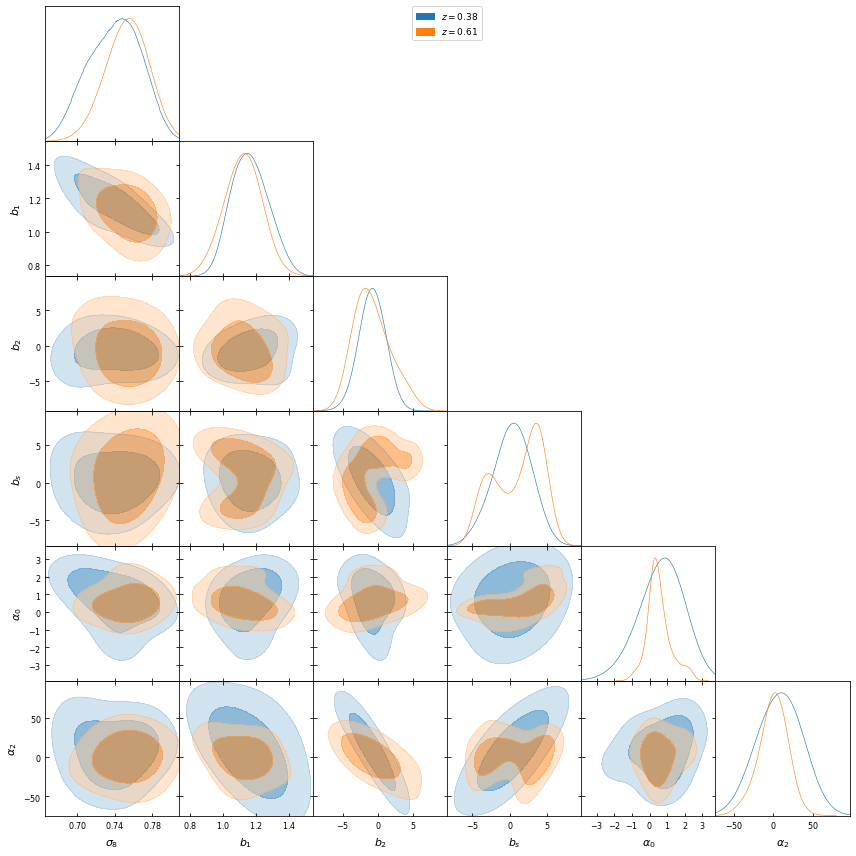

In [6]:
g = gdplt.get_subplot_plotter()
g.triangle_plot(chains,\
                ["sig8","b1","b2","bs","alpha0","alpha2"],\
                colors=['C0','C1'],\
                line_args=[\
                           {'ls':'-', 'color':'C0'},\
                           {'ls':'-', 'color':'C1'},\
                          ],\
                legend_labels=[r'$z=0.38$',r'$z=0.61$'],\
                filled=True,alphas=[0.5,0.5])
#g.export('compare_corner_plot.pdf')

<Figure size 576x432 with 0 Axes>

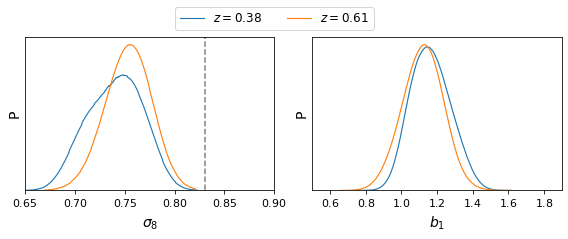

In [7]:
g = gdplt.get_single_plotter(width_inch=8)
g.plots_1d(chains, ['sig8','b1'], nx=2, normalized=True,\
           colors=['C0','C1'],\
           legend_labels=[r'$z=0.38$',r'$z=0.61$'],legend_ncol=2,\
           constrained_layout=True,xlims=[ [0.65,0.9],[0.5,1.9] ]);
g.subplots[0,0].axvline(0.83,color='grey',ls='--')
#g.export("compare_1d_posterior.pdf")